# Conversion of FITS image to PNG

In [1]:
# https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Astropy library - pip install astropy worked for me with and Open-CE build
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import os
import re
import os.path


## Project Configurations

In [2]:
# project config
cfg = {
    "image_path" : "../data",
    "output_path" : "../output",
    "classes" : ["cme_events", "non_cme_events"]
}

## Build Fits.gz image list

In [3]:
# Lets build a comprehensive image list

gz_files = []# [None]*10000

def is_fits(f):
    if ((re.search('fits$',f)) and os.path.isfile(fname)):
        return True
    else :
        return False

for root, dirs, files in os.walk(cfg['image_path']):
    for f in files:
        fname = os.path.join(root, f)
        if is_fits(fname):
            gz_files.append(fname)

print("Found {} fits image files".format(len(gz_files)))
print("Example file:  {}".format(gz_files[0]))

Found 4 fits image files
Example file:  ../data/non_cme_events/diff_25020855-25020856.fits


## Utility functions to 
* get numpy data from fits image
* display fits data
* save fits rendering as a png file

In [4]:
# returns numpy data array
def get_numpy_data(file_name):
    min_v = 1.e-20
    try :
        image_file = get_pkg_data_filename(file_name)
        print(fits.info(image_file))
        image_data = fits.getdata(image_file, ext=0,)
        
        # deal with zeros and negative values in data
        zero_threshold_indices = image_data <= 0.
        image_data[zero_threshold_indices] = min_v

    except :
        print("Error opening file {}".format(file_name))
        image_data = None
    return image_data 

def display_image(image_data, cmap="viridis", interp="none", filternorm="False", filterrad="1") :
    if(image_data is not None) :
        plt.figure()
        #plt.imshow(image_data, cmap='magma',interpolation="bicubic")
        #plt.imshow(image_data, cmap='viridis',interpolation="none") 
        plt.imshow(image_data, cmap=cmap, interpolation=interp, 
                   filternorm=filternorm, filterrad=filterrad )
                   #vmin=-30, vmax=-19) 
        plt.colorbar()  
    else :
        print("Image data not read from fits file.  Possibly malformed")
        
def create_png(image_data, outdir="/tmp", fileout="test.png") :
    if(image_data is not None) :
        print("writing file {} to directory {}".format(fileout, outdir))
        outfile = "/".join([outdir,fileout])
        #plt.figure()
        plt.imsave(outfile, image_data, cmap='viridis', dpi=30)
        print("wrote file to {}".format(outfile))
    #else :
    #    print("Malformed image data, not running")




## Display image

Filename: ../data/non_cme_events/diff_25020854-25020855.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   
None


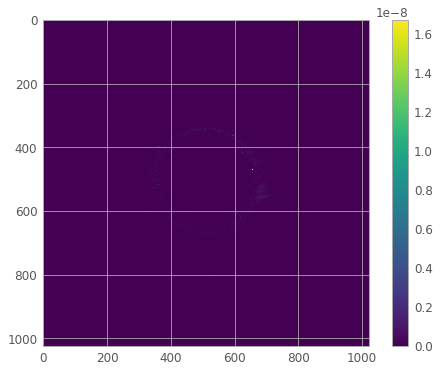

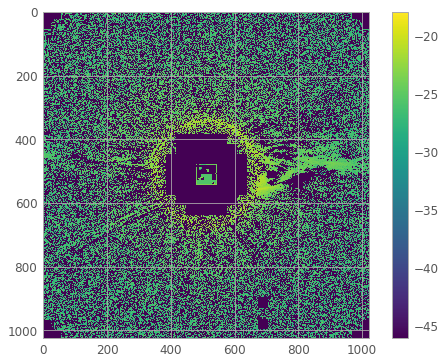

In [5]:
img_data= get_numpy_data(gz_files[1])
display_image(img_data)
#display_image(img_data, interp="blackman", filternorm="True", filterrad="4")
#img_data *= 10000000000.
display_image(np.log(img_data))
#display_image(np.log(img_data), interp='bicubic', filternorm="False", filterrad="1")
#display_image(np.log(img_data), interp="blackman", filternorm="True", filterrad="4")
#display_image(np.log2(img_data), interp="blackman", filternorm="True", filterrad="8")
#display_image(np.log2(img_data), interp="blackman", filternorm="True", filterrad="16")
#display_image(np.log2(img_data), interp="blackman", filternorm="True", filterrad="32")

In [6]:
''' 
for f in sorted(gz_files):
    print (f"FILE:{f}")
    img_data= get_numpy_data(f)
    display_image(np.log(img_data))
'''

' \nfor f in sorted(gz_files):\n    print (f"FILE:{f}")\n    img_data= get_numpy_data(f)\n    display_image(np.log(img_data))\n'

In [7]:
gz_files[0]

'../data/non_cme_events/diff_25020855-25020856.fits'

## Example of image Save

In [8]:

# For now just grab filename and 
import pathlib
def create_output_filename(cfg,file_in) :
    p = pathlib.Path(file_in)
    basename = os.path.basename(p).replace('.fits','')
    ''' 
    f_fts = p.stem
    # grab two parent directories above (just based on inspection.  add to filename for debug and traceabiltily)
    parent_info = str(p.parent).split('/')
    parent_info = parent_info[-2:len(parent_info)]
    parent_info = "_".join(parent_info)
    
    file_out = "_".join([parent_info,str(f_fts)]) 
    '''
    file_out = basename.split('\.')[0] + ".png"
    return file_out

# Test 
out_filename = create_output_filename(cfg, gz_files[0])
out_filename

'diff_25020855-25020856.png'

In [9]:
# !rm -rf /gpfs/home/s4s004/vanstee/2020-11-nasa/dataout
#! mkdir -p /gpfs/home/s4s004/vanstee/2020-11-nasa/dataout/cme_events
#! mkdir -p ../tests/cme_events
#! mkdir -p /gpfs/home/s4s004/vanstee/2020-11-nasa/dataout/non_cme_events
#! mkdir -p ../tests/non_cme_events
! mkdir -p {../tests/test_output}


Filename: ../data/non_cme_events/diff_25020855-25020856.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   
None
writing file diff_25020855-25020856.png to directory ../output
wrote file to ../output/diff_25020855-25020856.png


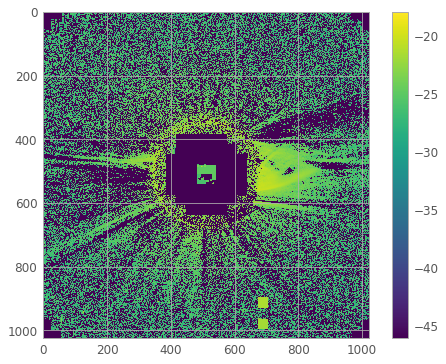

In [10]:
# Single Inspection !
#test_file_name = "/gpfs/home/b0p154/b0p154al/data/cme_events/140613/c2/25506960.fts.gz"
test_file_name = gz_files[0]

cme_class="cme_events"
img_data = np.log(get_numpy_data(test_file_name))
# print(img_data)
# display_image(img_data)
out_filename = create_output_filename(cfg, test_file_name)
#create_png(img_data, outdir=cfg["output_path"]+"/"+cme_class, fileout=out_filename)
create_png(img_data, outdir=cfg["output_path"], fileout=out_filename)
display_image(img_data)

In [11]:
# If i get time maybe make a grid of these using random numbers to spot check ..
# fig = plt.figure()
# ax1 = fig.add_subplot(2,2,1)
# ax1.imshow(...)
# ax2 = fig.add_subplot(2,2,2)
# ax2.imshow(...)
# ax3 = fig.add_subplot(2,2,3)
# ax3.imshow(...)
# ax4 = fig.add_subplot(2,2,4)
# ax4.imshow(...)

## Process files in parallel with dask 

In [12]:
import dask

# This function will be run in parallel ...
def process_file(cfg, cme_class, file) :
    rv = 0
    img_data = get_numpy_data(file)
    if(img_data is not None) :
        out_filename = create_output_filename(cfg, file)
        create_png(np.log(img_data), outdir=cfg["output_path"], fileout=out_filename)   
        rv = 1
        
    return rv
    
# Here we use dask to parallelize the convesion process 
# dask_create_png
from dask import delayed
def process_files(cfg, file_limit):
    
    ncme_cnt=0
    cme_cnt=0
    dask_processing_list = []
    for f in gz_files :
        # Does filename ma
        if (re.search("non_cme_events", f) and ncme_cnt < file_limit) :
            print("Processing non_cme_event {}".format(f))
            dask_processing_list.append(delayed(process_file)(cfg, "non_cme_events", f))
            ncme_cnt +=1
        elif (not(re.search("non_cme_events", f)) and cme_cnt < file_limit):
            print("Processing non_cme_event {}".format(f))
            dask_processing_list.append(delayed(process_file)(cfg, "cme_events", f))
            cme_cnt +=1
        
        if (ncme_cnt >= file_limit and cme_cnt >= file_limit) :
            break
            
    return dask_processing_list
    
# Single Inspection !
delayed_processing = process_files(cfg, 100 )

Processing non_cme_event ../data/non_cme_events/diff_25020855-25020856.fits
Processing non_cme_event ../data/non_cme_events/diff_25020854-25020855.fits
Processing non_cme_event ../data/cme_events/diff_25020851-25020852.fits
Processing non_cme_event ../data/cme_events/diff_25020852-25020853.fits


### Trigger dask events

In [13]:
delayed_processing_sum = sum(delayed_processing)
delayed_processing_sum.compute()

Filename: ../data/non_cme_events/diff_25020854-25020855.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   
Filename: ../data/cme_events/diff_25020851-25020852.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   
Filename: ../data/cme_events/diff_25020852-25020853.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   None

Filename: ../data/non_cme_events/diff_25020855-25020856.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      81   (1024, 1024)   float32   
None
None
None
writing file diff_25020854-25020855.png to directory ../output
writing file diff_25020851-25020852.png to directory ../output
writing file diff_25020852-25020853.png to directory ../output
writing file diff_25020855-25020856

4

### Spot Check Results

In [14]:
print(cfg['output_path'])
! ls {cfg['output_path']}/non_cme_events | wc
! ls {cfg['output_path']}/cme_events | wc
! ls {cfg['output_path']}

../output
ls: ../output/non_cme_events: No such file or directory
       0       0       0
ls: ../output/cme_events: No such file or directory
       0       0       0
altdata                    diff_25020852-25020853.png
data                       diff_25020854-25020855.png
diff_25020851-25020852.png diff_25020855-25020856.png


# Import Images into Maximo Visual Insights

In [15]:
import json
import sys
import logging as logger
import glob
import os
sys.path.append('/gpfs/home/s4s004/vanstee/2020-11-nasa/vision-tools/lib')
import vapi


ModuleNotFoundError: No module named 'vapi'

## Authenticate to server

In [ ]:
# for this to work, you need to export PYTHONPATH prior to opening this notebook !
# in mvi_env.sh
# PATH=$PATH:~/2020-11-nasa/vision-tools/cli
# export PYTHONPATH=$PYTHONPATH:~/2020-11-nasa/vision-tools/lib
# export VAPI_HOST=129.40.48.4
# export VAPI_INSTANCE=visual-inspection
# export VAPI_TOKEN=`vision user token --user zhang  --password passw0rd`
# vision datasets list --summary

In [ ]:
!vision datasets list --summary

In [ ]:
server = vapi.connect_to_server(host="129.40.48.4", token="", instance="visual-inspection")
token_json = server.users.get_token("zhang", "passw0rd")#insert username and password here
print(token_json)

In [ ]:
token = token_json["token"]
server = vapi.connect_to_server(host="129.40.48.4", token=token, instance="visual-inspection")


## Get png file names

In [ ]:
png_files = glob.glob(cfg['output_path']+"/cme_events/*png")
print("Found {} png files".format(len(png_files)))

In [ ]:
# Get DSID manually for now
!vision datasets list --summary

In [ ]:
# This loops the file names in the array through the upload function
# There is a potential to use Dask here to speed up the upload to max of MVI system http handler
# .. leave for now

for i,file in enumerate(png_files):
    server.files.upload(dsid="cde180b8-a59e-470b-bcc2-46ce09f7e377", file_paths=[file])
    if(i%10) == 0: print("Uploaded {} files".format(i))


In [ ]:
if server.rsp_ok():
    # Pretty print the details
    # print(json.dumps(server.json(), indent=2))
    # Show details about the dataset passed in.
    print(json.dumps(server.json(), indent=2))
else:
    # Something went wrong. Show the status code.
    # All of visual-inspections failure messages should be in json, so pretty print that
    print(f"Request failed with code {server.status_code()}", file=sys.stderr)
    print(json.dumps(server.json(), indent=2), file=sys.stderr)

